<a href="https://colab.research.google.com/github/MIHIR2006/Health-care-ML/blob/main/Helthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import seaborn as sns

In [ ]:
#loading dataset

data = pd.read_csv('/content/drive/MyDrive/large_data.csv')


#Display the first few rows and sumary information
data_info = data.info() #Strucutre of the data
data_head = data.info(10) #Check the first five rows

data_info,data_head

data.shape

data.describe() #important columns

print(data.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44453 entries, 0 to 44452
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COUGH                 44453 non-null  int64 
 1   MUSCLE_ACHES          44453 non-null  int64 
 2   TIREDNESS             44453 non-null  int64 
 3   SORE_THROAT           44453 non-null  int64 
 4   RUNNY_NOSE            44453 non-null  int64 
 5   STUFFY_NOSE           44453 non-null  int64 
 6   FEVER                 44453 non-null  int64 
 7   NAUSEA                44453 non-null  int64 
 8   VOMITING              44453 non-null  int64 
 9   DIARRHEA              44453 non-null  int64 
 10  SHORTNESS_OF_BREATH   44453 non-null  int64 
 11  DIFFICULTY_BREATHING  44453 non-null  int64 
 12  LOSS_OF_TASTE         44453 non-null  int64 
 13  LOSS_OF_SMELL         44453 non-null  int64 
 14  ITCHY_NOSE            44453 non-null  int64 
 15  ITCHY_EYES            44453 non-null

In [ ]:

#Data pre possing:Feature Scaleing
data.isnull().sum() # 1 Null values

import numpy as np
from scipy import stats

# List of symptom columns
symptoms = [
    'COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'RUNNY_NOSE', 'STUFFY_NOSE', 'FEVER',
    'NAUSEA', 'VOMITING', 'DIARRHEA', 'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING',
    'LOSS_OF_TASTE', 'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH',
    'ITCHY_INNER_EAR', 'SNEEZING', 'PINK_EYE'
]

# Checking for outliers in all symptoms columns using Z-scores
z_scores = np.abs(stats.zscore(data[symptoms]))

# Identifying rows with any Z-score greater than 3, indicating outliers
outliers = data[(z_scores > 3).any(axis=1)]

# Displaying the number of outliers found in the dataset
outliers_info = outliers.shape
outliers_info

data['TYPE'].value_counts()

,count
TYPE,
FLU,25000
ALLERGY,16381
COVID,2048
COLD,1024


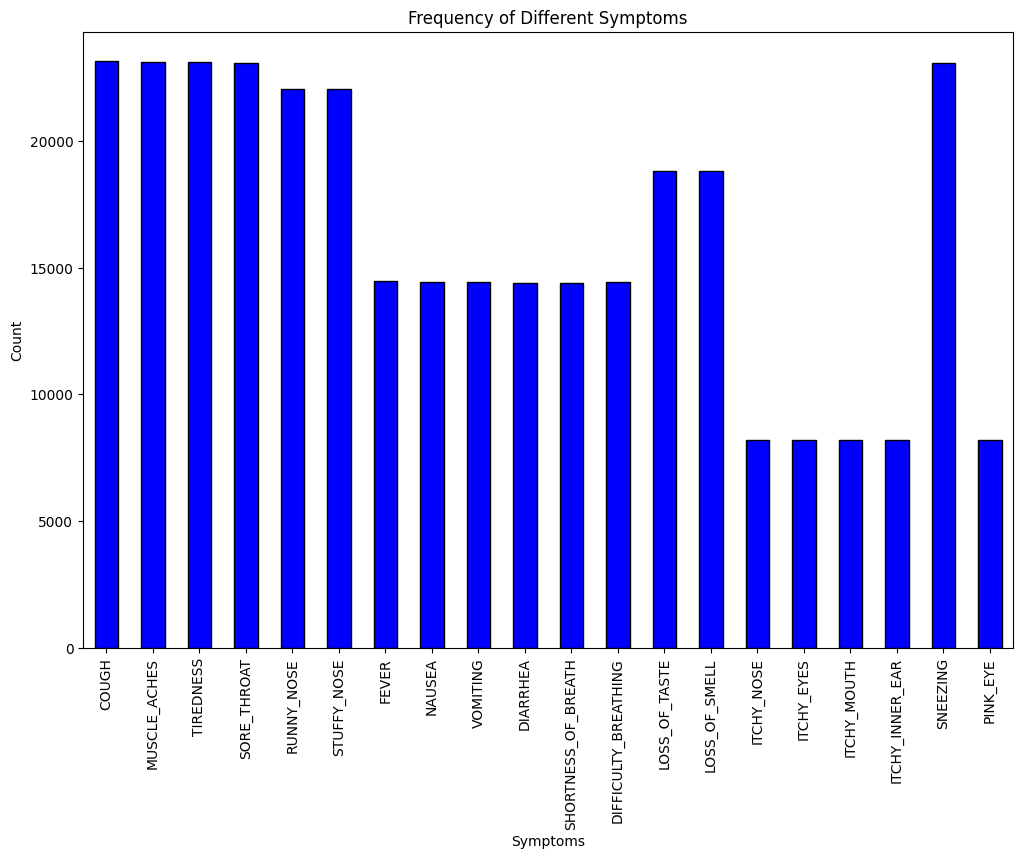

In [ ]:
# 1. Bar Plots for comparing the frequency of different symptoms
symptom_columns = data.columns[:-1]  # All columns except 'TYPE'

# Plot
plt.figure(figsize=(12, 8))
data[symptom_columns].sum().plot(kind='bar',color='blue',edgecolor='black')
plt.title('Frequency of Different Symptoms')
plt.ylabel('Count')
plt.xlabel('Symptoms')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

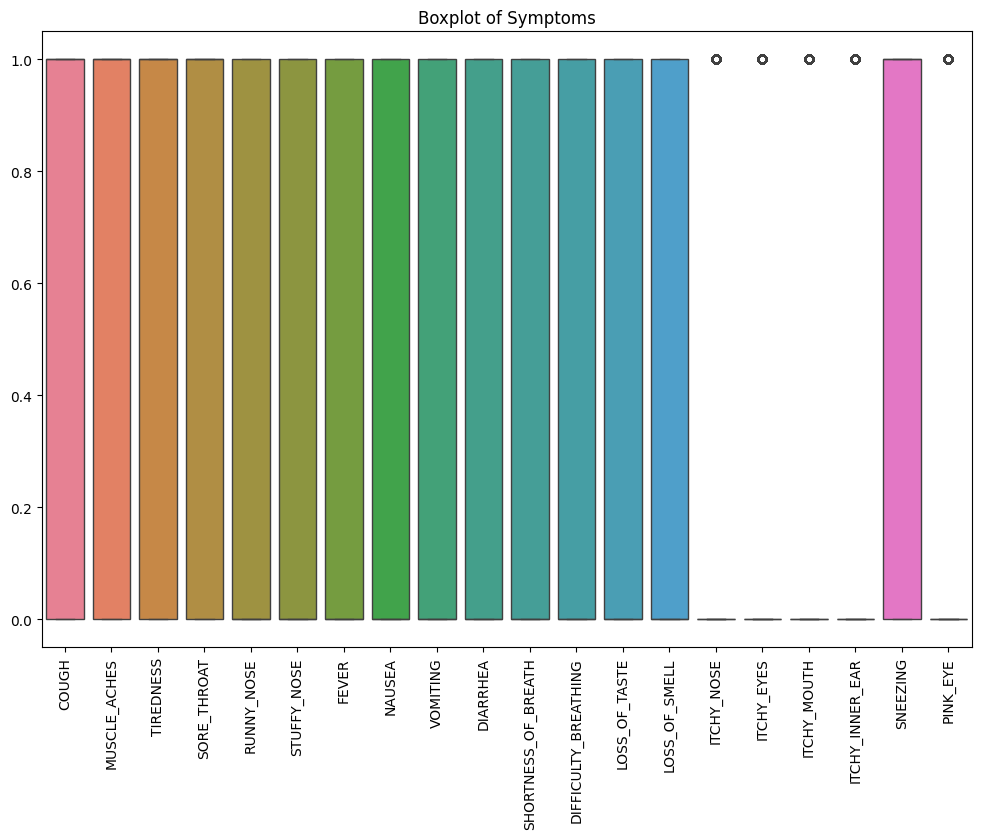

In [ ]:
# 2. Box Plots to check distribution and outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[symptom_columns])
plt.title('Boxplot of Symptoms')
plt.xticks(rotation=90)
plt.show()

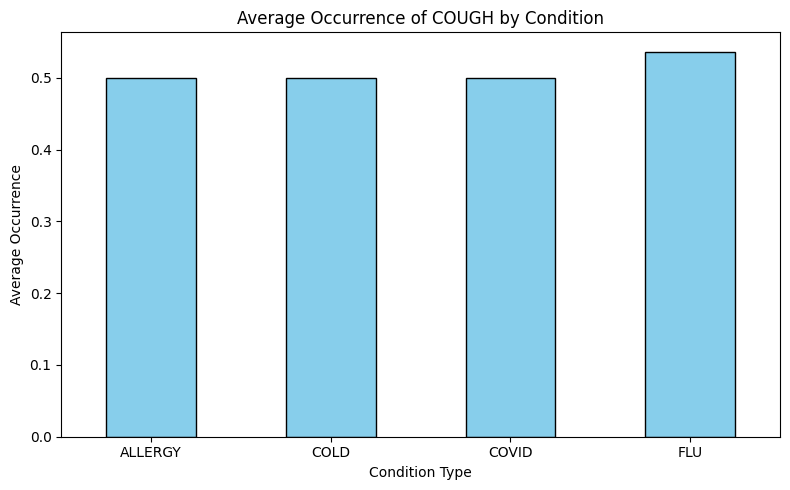

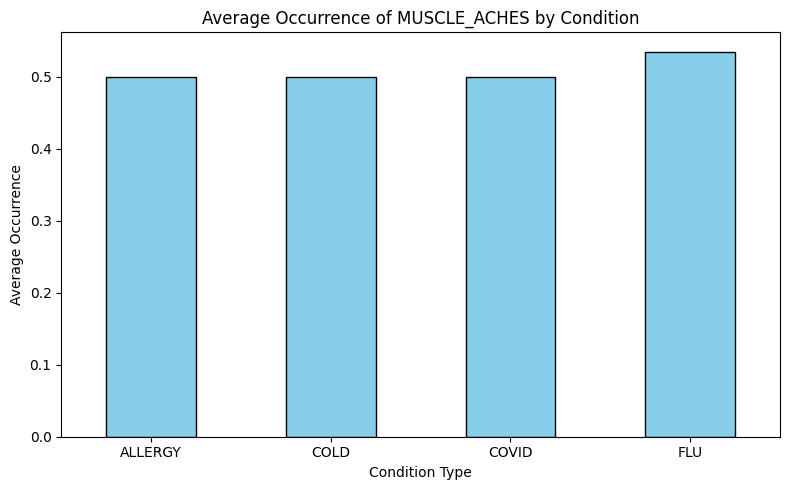

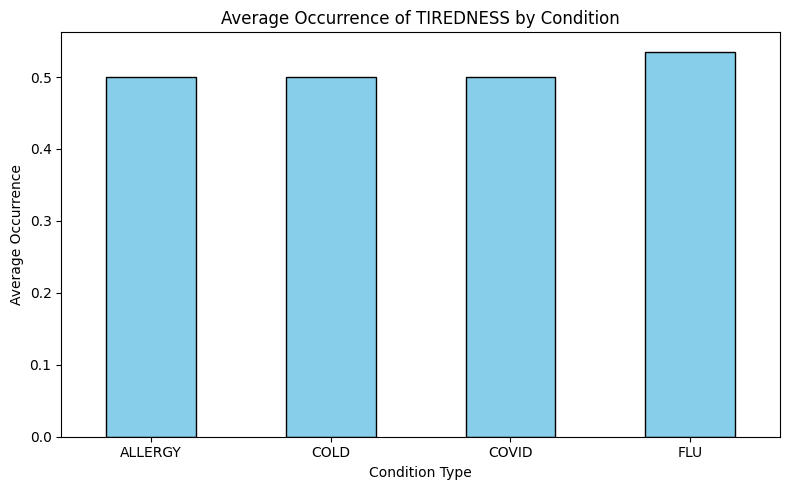

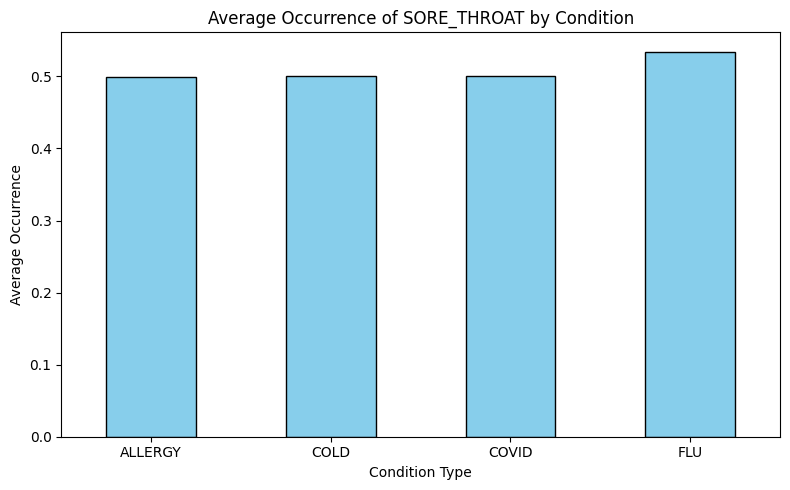

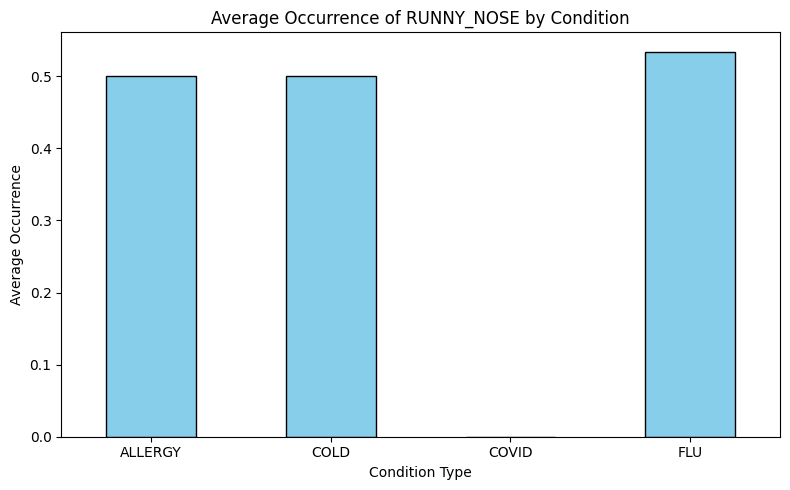

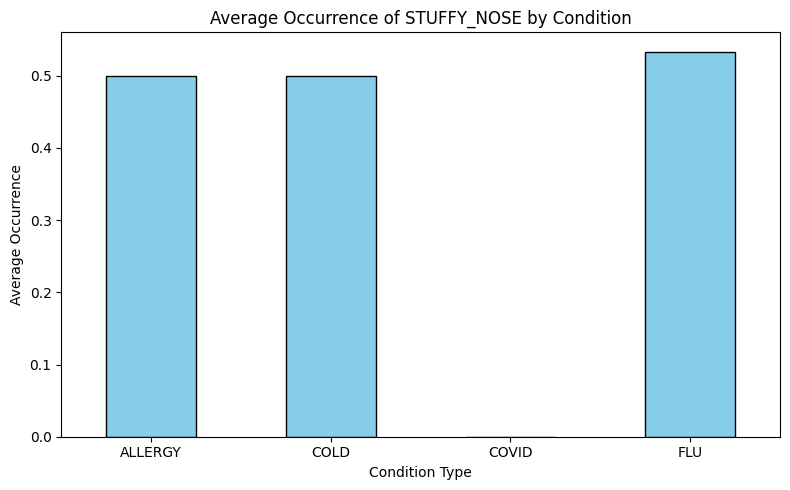

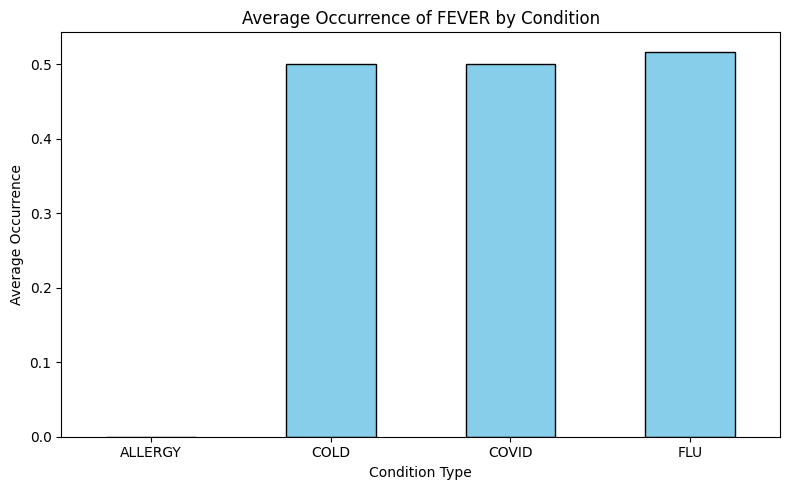

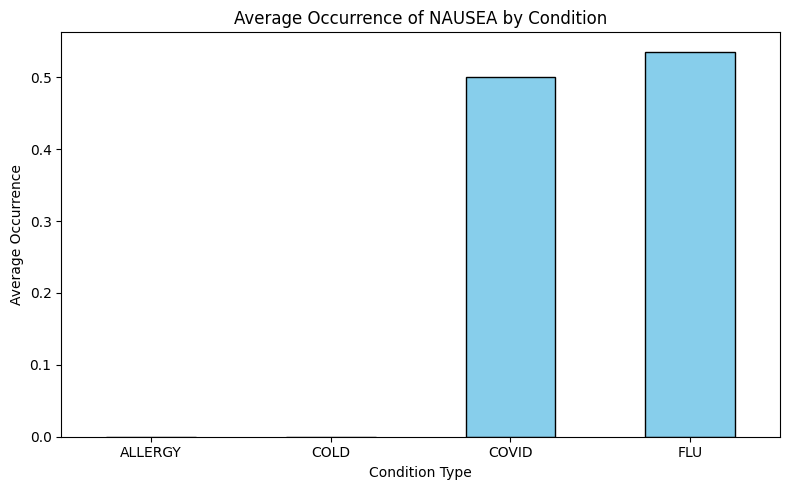

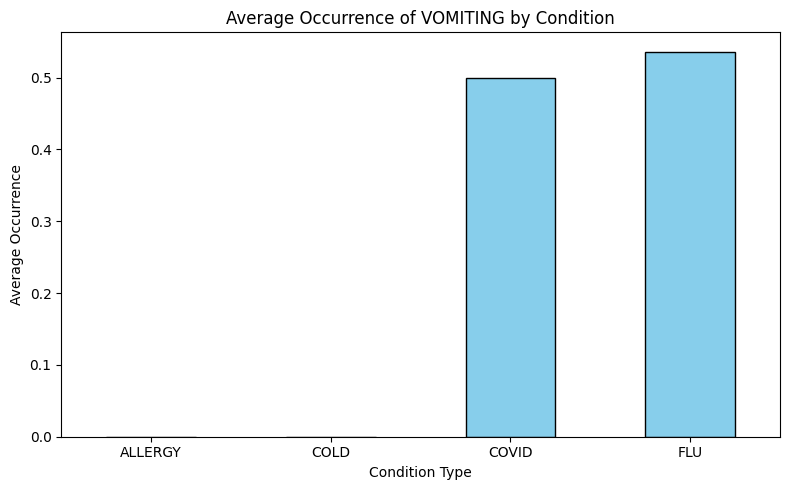

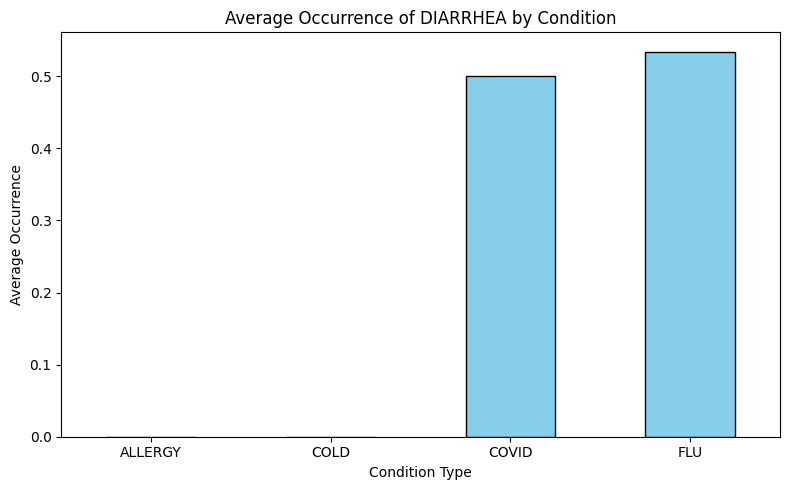

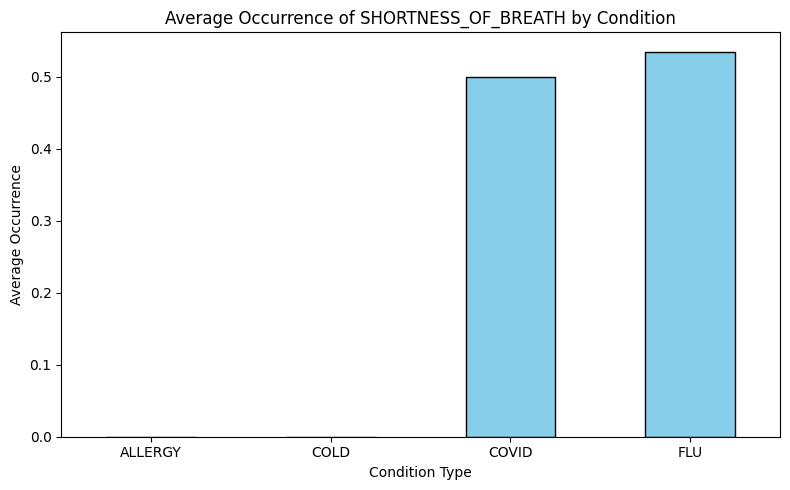

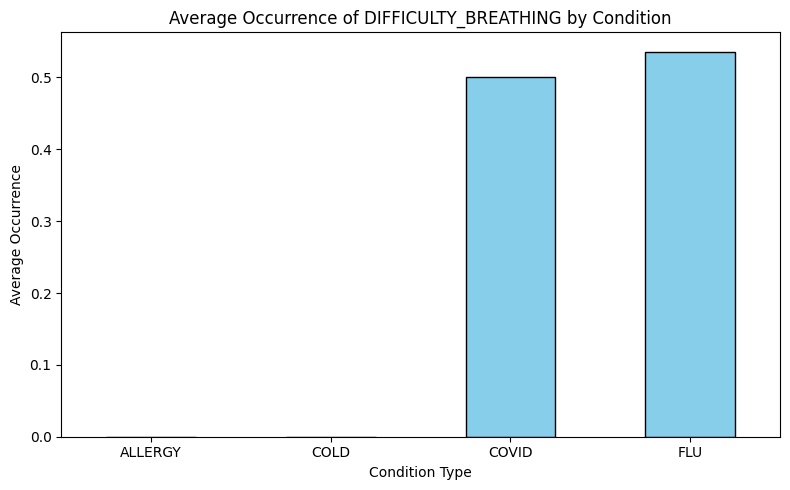

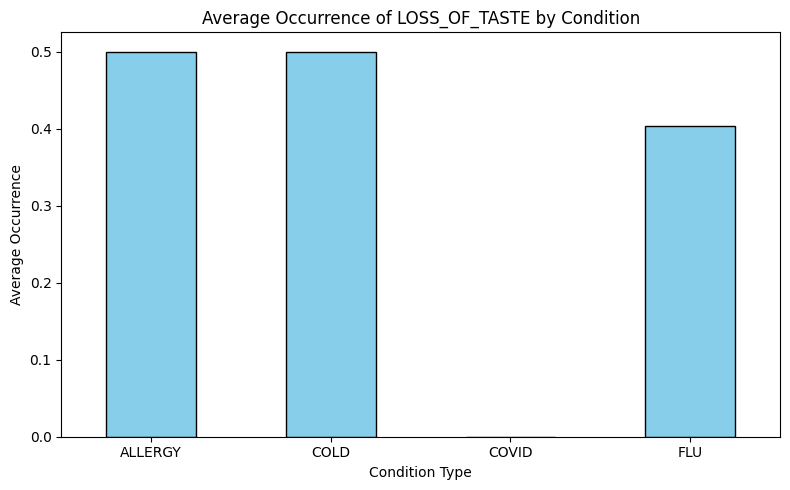

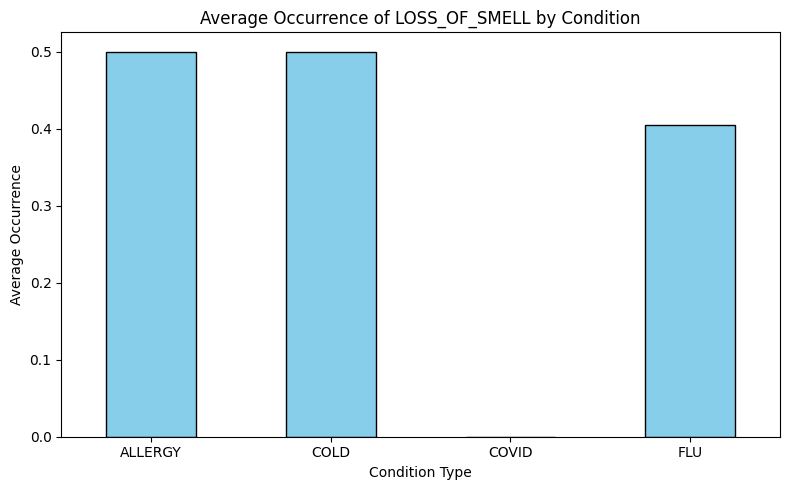

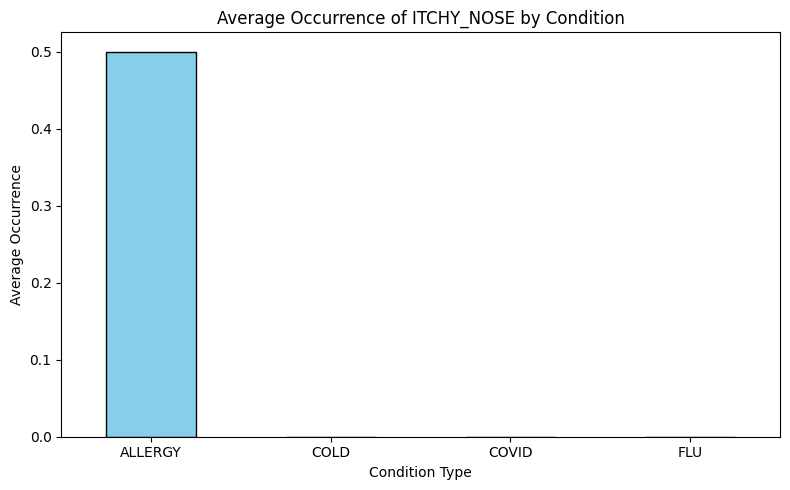

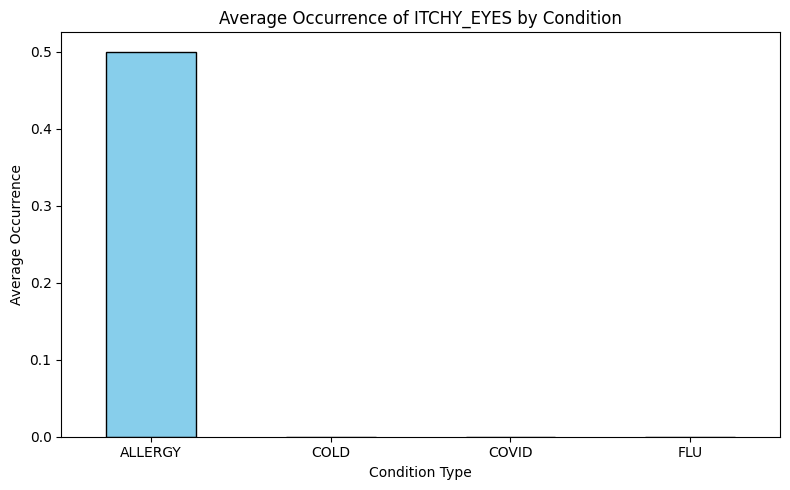

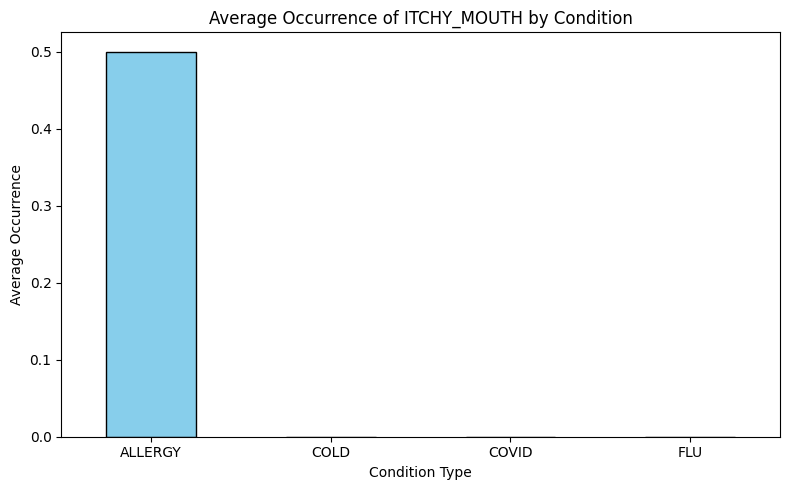

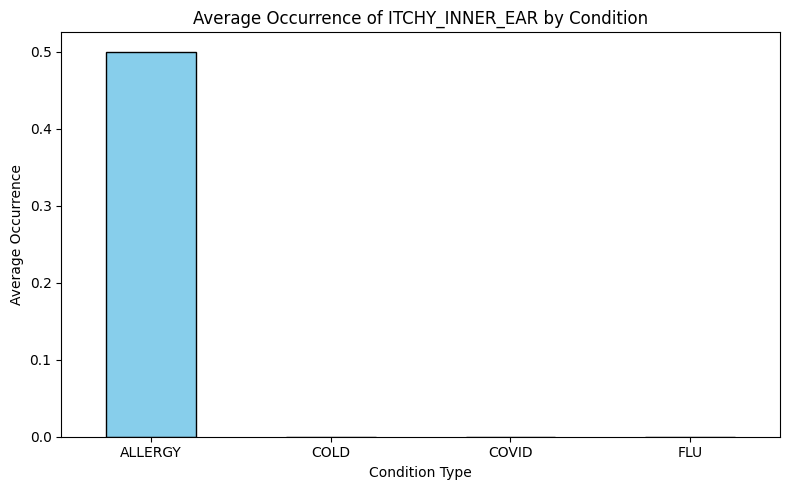

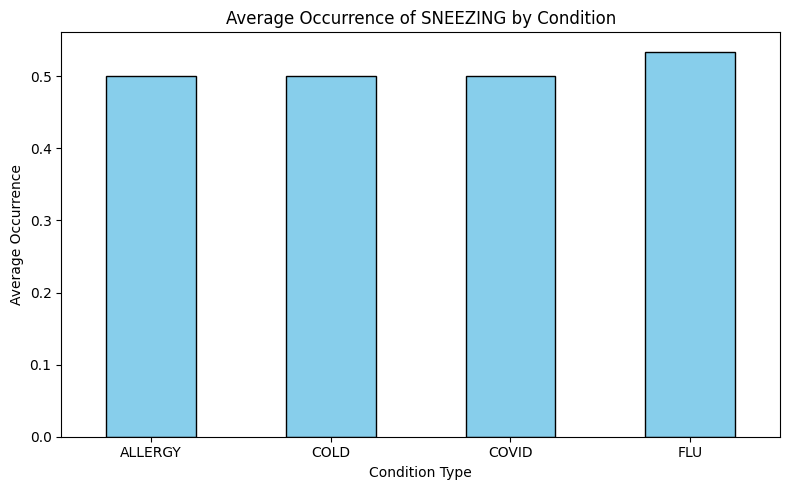

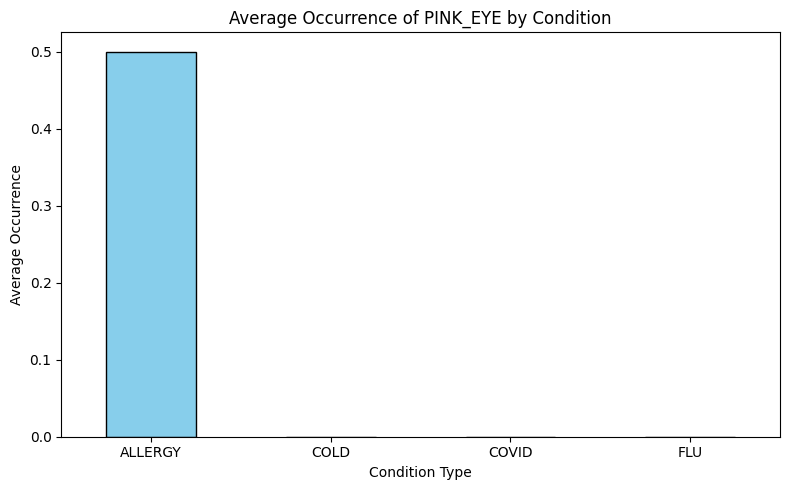

In [ ]:
import matplotlib.pyplot as plt

# Create visualizations for each column
for symptom in symptoms:
    plt.figure(figsize=(8, 5))
    data.groupby('TYPE')[symptom].mean().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Average Occurrence of {symptom} by Condition')
    plt.ylabel('Average Occurrence')
    plt.xlabel('Condition Type')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

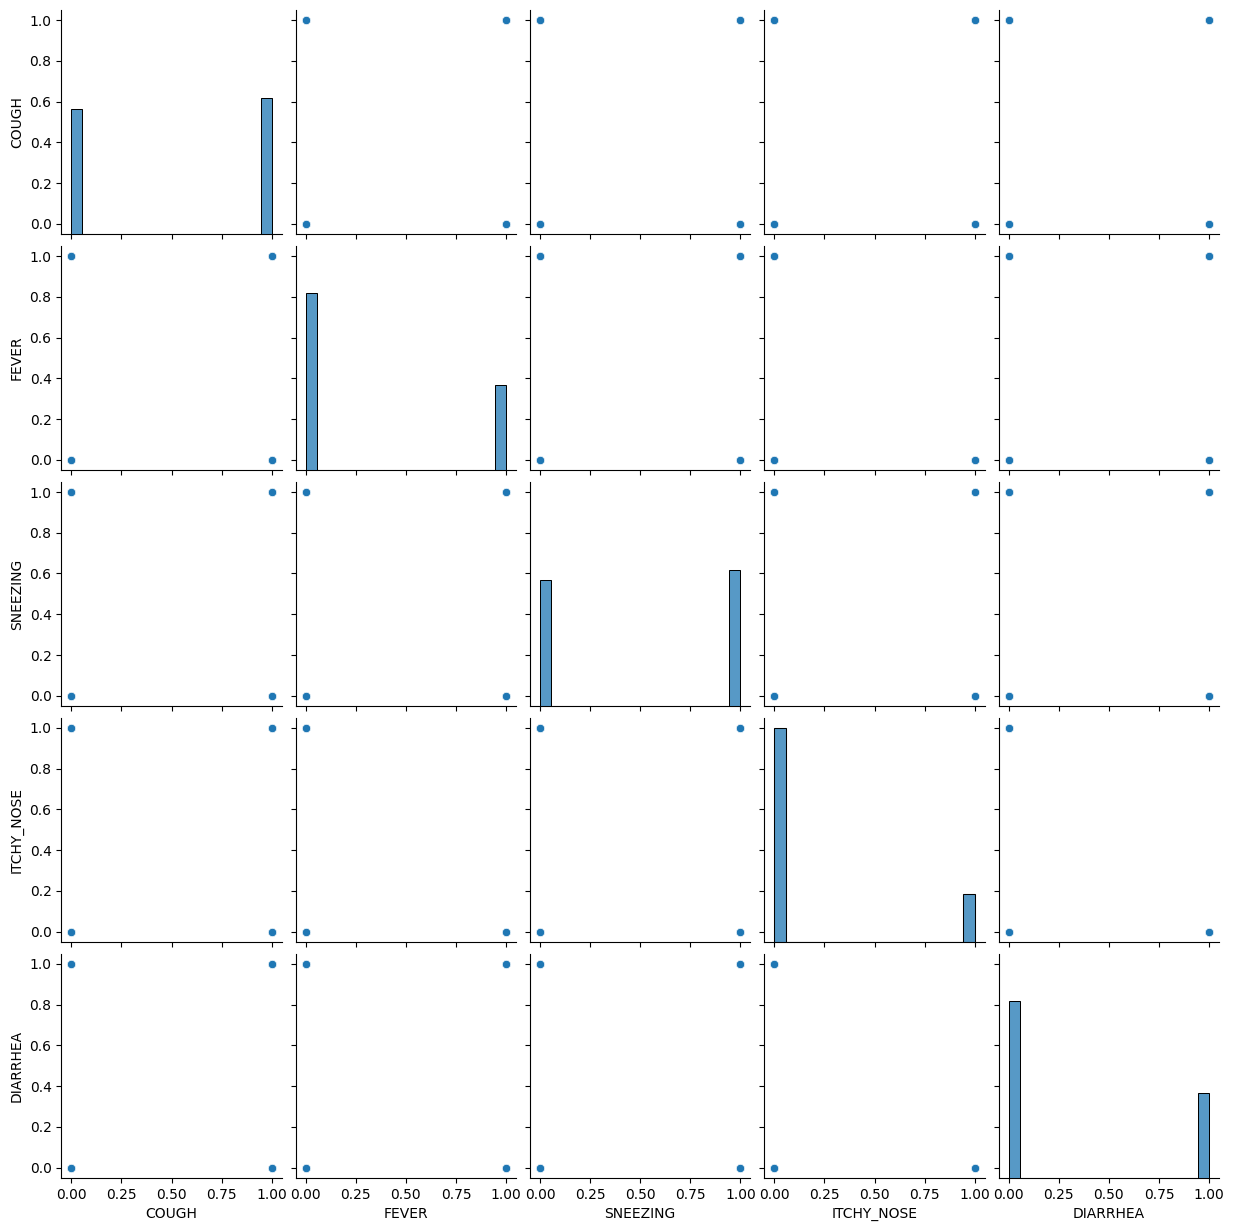

In [ ]:
# 3. Pair Plot for pairwise relationships between symptoms
# We'll use a subset of symptoms to avoid overplotting
subset_symptoms = ['COUGH', 'FEVER', 'SNEEZING', 'ITCHY_NOSE', 'DIARRHEA']
sns.pairplot(data[subset_symptoms])
plt.show()


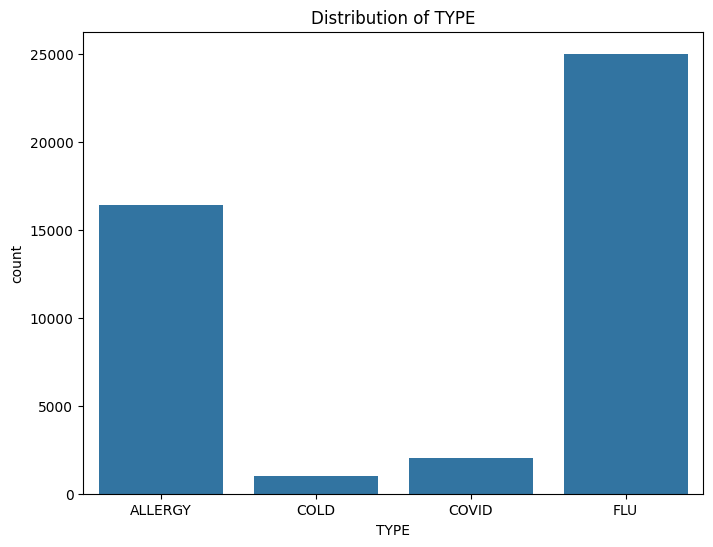

In [ ]:
# 4. Count Plot for distribution of 'TYPE'
plt.figure(figsize=(8, 6))
sns.countplot(x='TYPE', data=data)
plt.title('Distribution of TYPE')
plt.show()


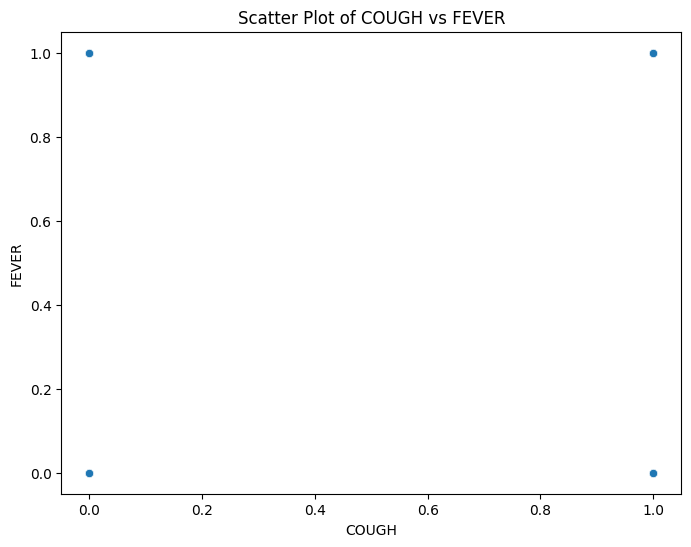

In [ ]:
# 5. Scatter Plots to visualize relationships between two specific symptoms
plt.figure(figsize=(8, 6))
sns.scatterplot(x='COUGH', y='FEVER', data=data)
plt.title('Scatter Plot of COUGH vs FEVER')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

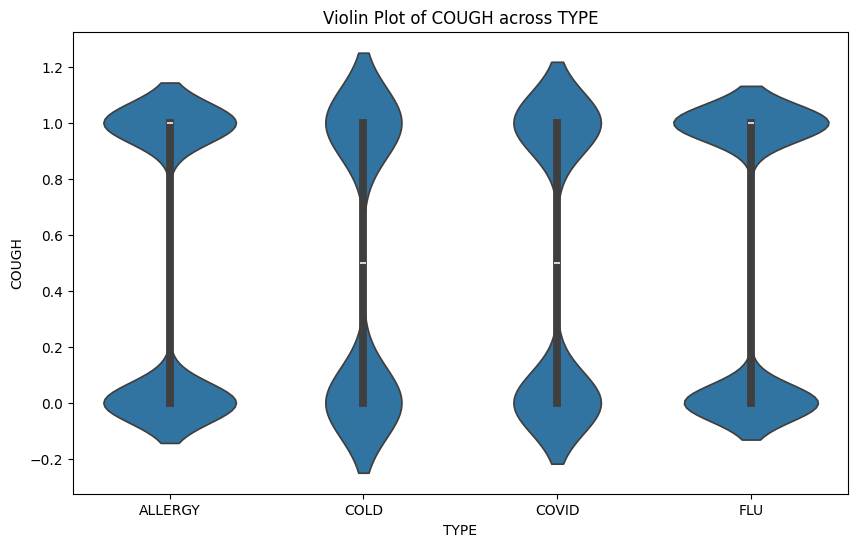

In [ ]:
# 6. Violin Plots for showing the distribution and probability density of symptoms
plt.figure(figsize=(10, 6))
sns.violinplot(x='TYPE', y='COUGH', data=data)
plt.title('Violin Plot of COUGH across TYPE')
plt.show()


<Figure size 1200x800 with 0 Axes>

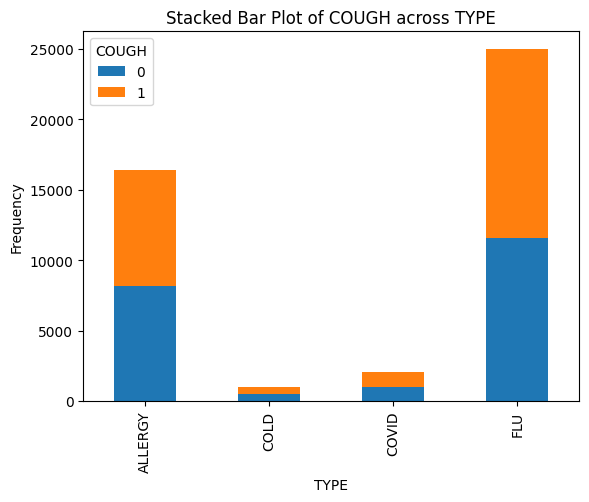

In [ ]:
# 7. Stacked Bar Plots for visualizing symptoms across TYPE categories
plt.figure(figsize=(12, 8))
pd.crosstab(data['TYPE'], data['COUGH']).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of COUGH across TYPE')
plt.xlabel('TYPE')
plt.ylabel('Frequency')
plt.show()


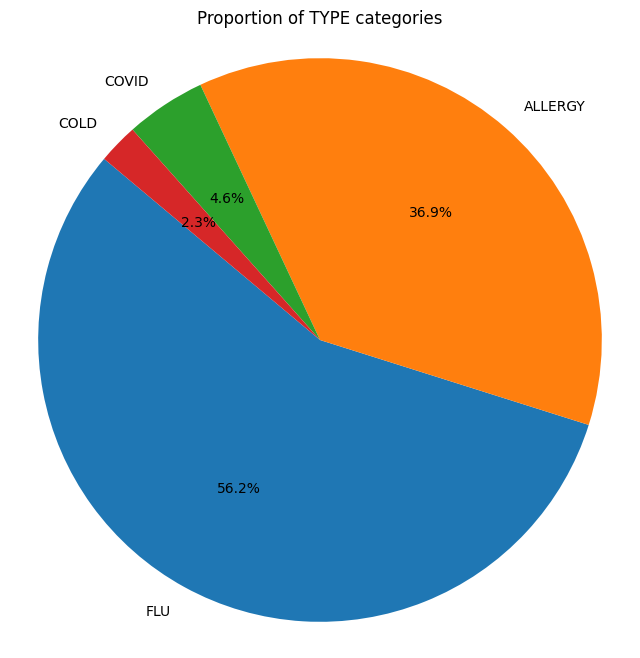

In [ ]:
# 8. Pie Chart for proportions in the 'TYPE' column
type_distribution = data['TYPE'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_distribution, labels=type_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of TYPE categories')
plt.axis('equal')
plt.show()


<ipython-input-21-6b7b5fc01940>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['COUGH'], label='COUGH', shade=True)
<ipython-input-21-6b7b5fc01940>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['FEVER'], label='FEVER', shade=True)


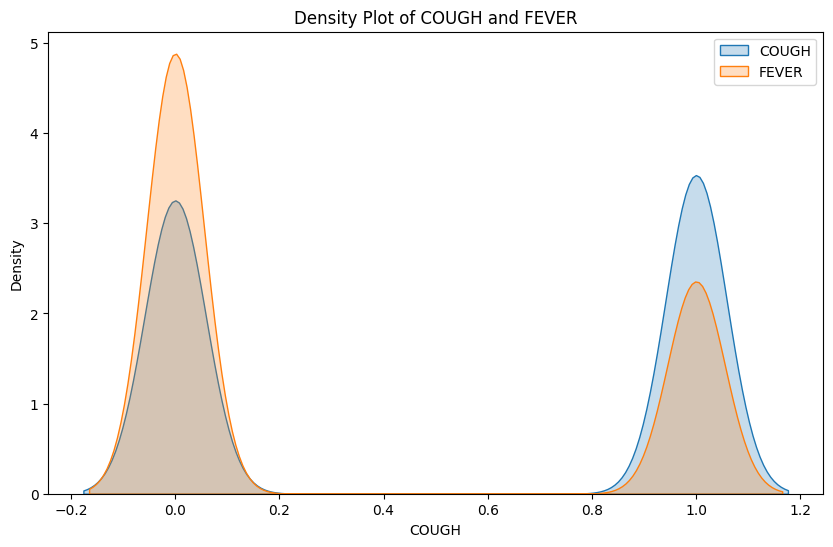

In [ ]:
# 9. Density Plot for probability density of symptom distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(data['COUGH'], label='COUGH', shade=True)
sns.kdeplot(data['FEVER'], label='FEVER', shade=True)
plt.title('Density Plot of COUGH and FEVER')
plt.legend()
plt.show()

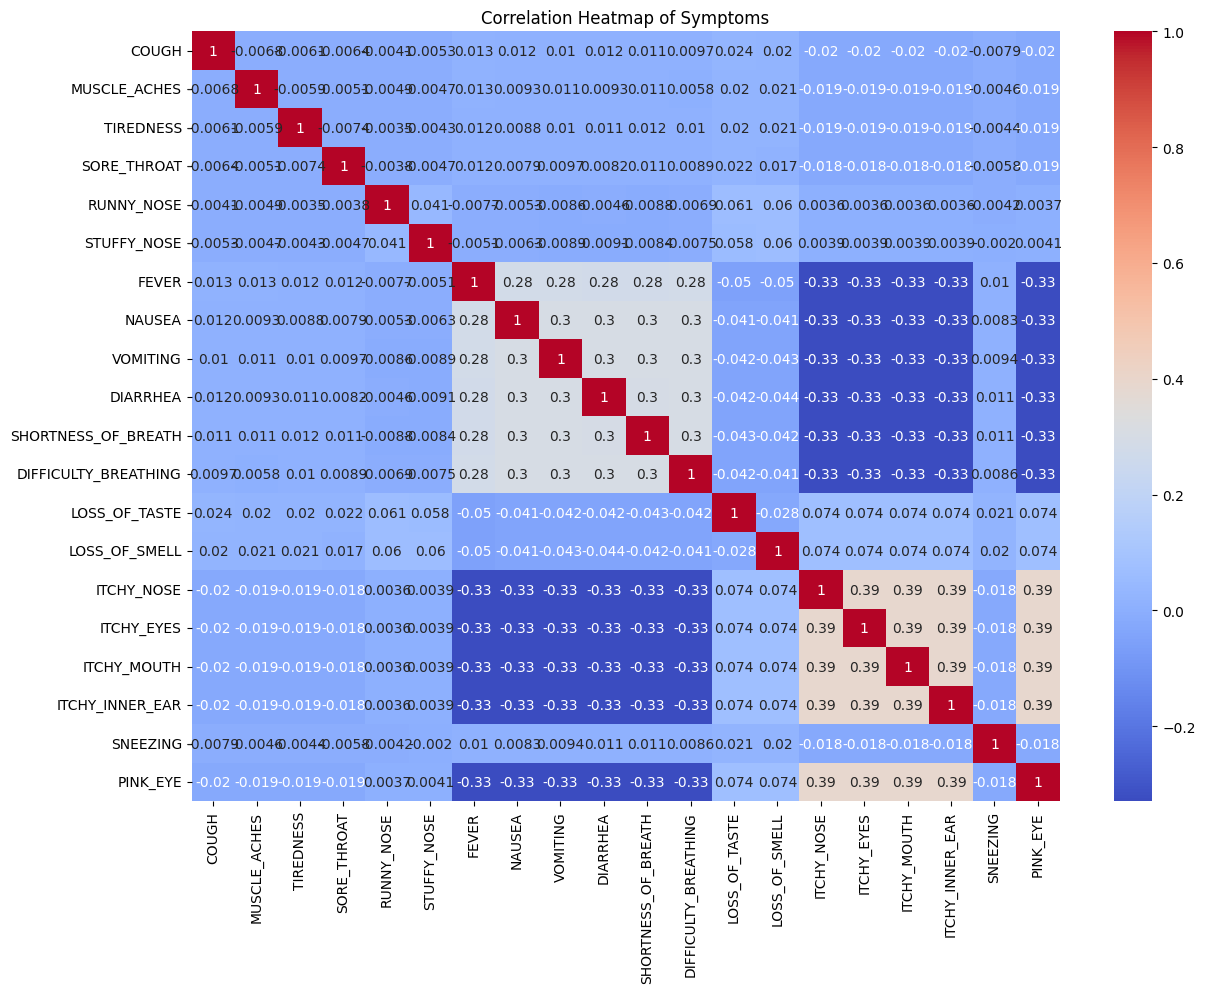

In [ ]:
import numpy as np
from wordcloud import WordCloud
from pandas.plotting import parallel_coordinates

# 10. Heatmap to show correlation between symptoms
plt.figure(figsize=(14, 10))
correlation_matrix = data[symptom_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap of Symptoms')
plt.show()


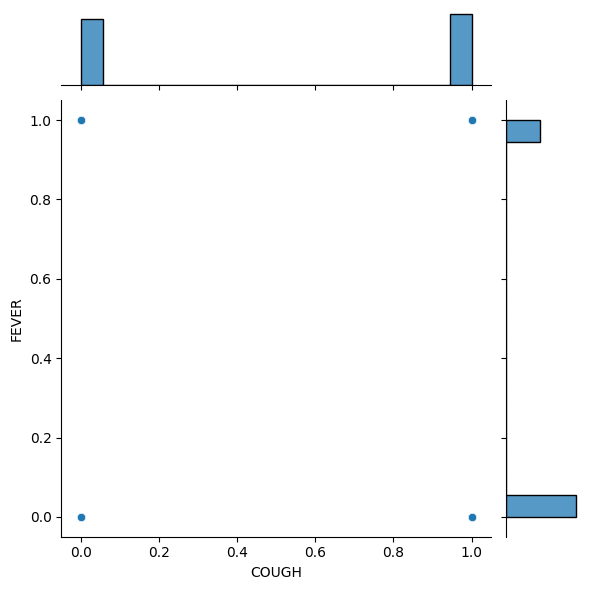

In [ ]:
# 11. Joint Plot for COUGH vs FEVER
sns.jointplot(x='COUGH', y='FEVER', data=data, kind='scatter')
plt.show()


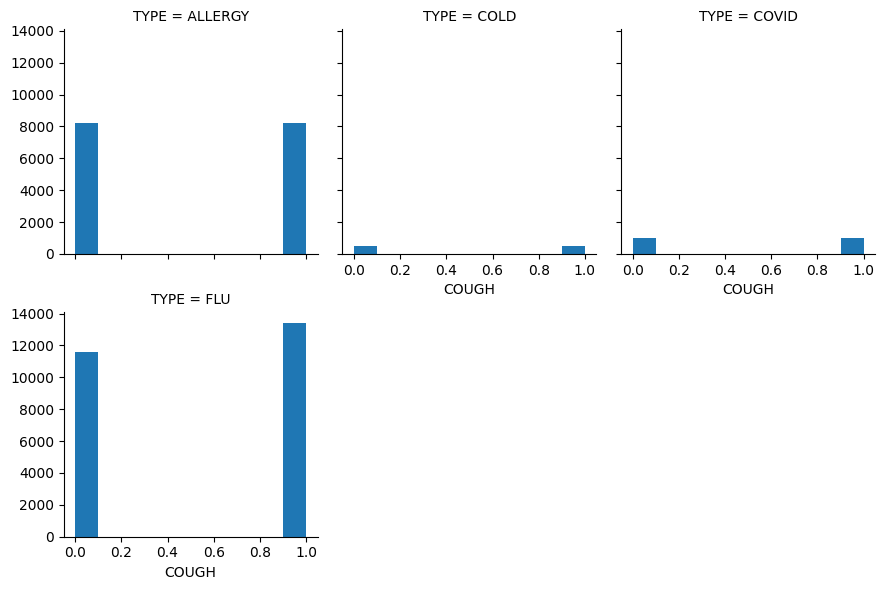

In [ ]:
# 12. Facet Grid for multiple symptom categories across TYPE
facet = sns.FacetGrid(data, col="TYPE", col_wrap=3)
facet.map(plt.hist, "COUGH")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


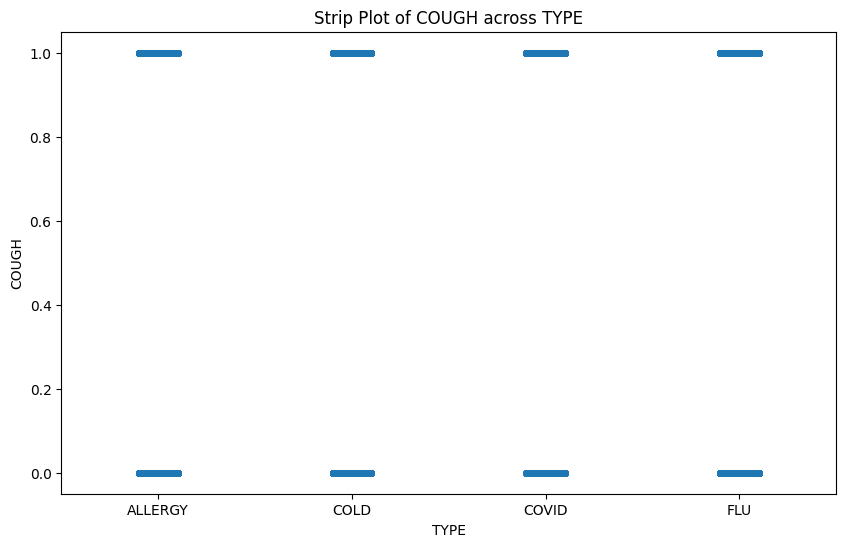

In [ ]:
# 13. Strip Plot for COUGH across TYPE
plt.figure(figsize=(10, 6))
sns.stripplot(x='TYPE', y='COUGH', data=data)
plt.title('Strip Plot of COUGH across TYPE')
plt.show()


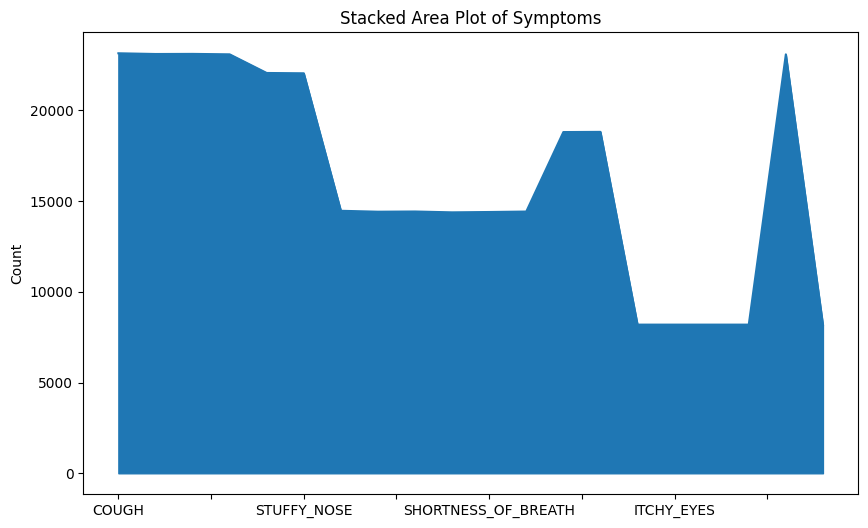

In [ ]:
# 14. Stacked Area Plot for symptoms
stacked_data = data[symptom_columns].sum()
stacked_data.plot(kind='area', stacked=True, figsize=(10, 6))
plt.title('Stacked Area Plot of Symptoms')
plt.ylabel('Count')
plt.show()


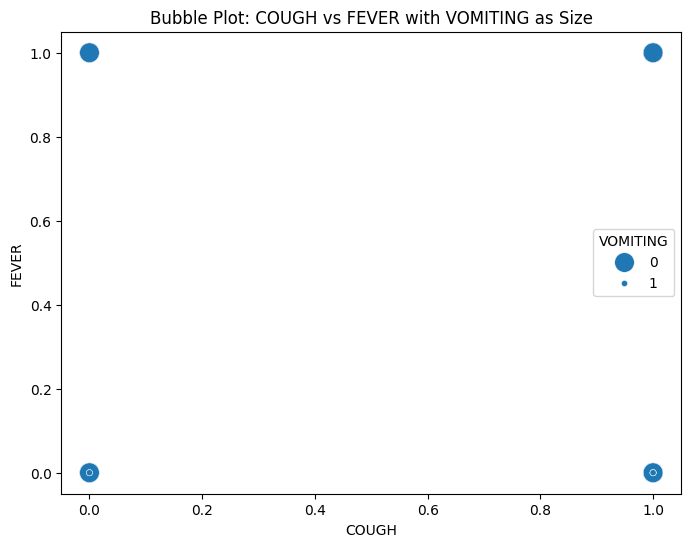

In [ ]:
# 15. Bubble Plot for COUGH vs FEVER with VOMITING as bubble size
plt.figure(figsize=(8, 6))
sns.scatterplot(x='COUGH', y='FEVER', size='VOMITING', sizes=(20, 200), data=data)
plt.title('Bubble Plot: COUGH vs FEVER with VOMITING as Size')
plt.show()


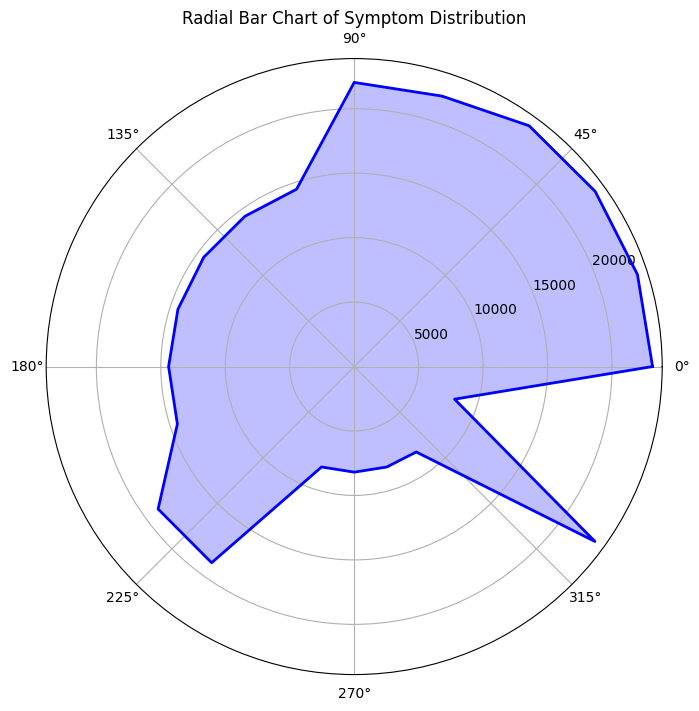

In [ ]:
import numpy as np
from wordcloud import WordCloud
from pandas.plotting import parallel_coordinates

# 16. Radial Bar Chart for symptom distribution
angles = np.linspace(0, 2 * np.pi, len(symptom_columns), endpoint=False).tolist()
values = data[symptom_columns].sum().tolist()
values += values[:1]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)
plt.title('Radial Bar Chart of Symptom Distribution')
plt.show()




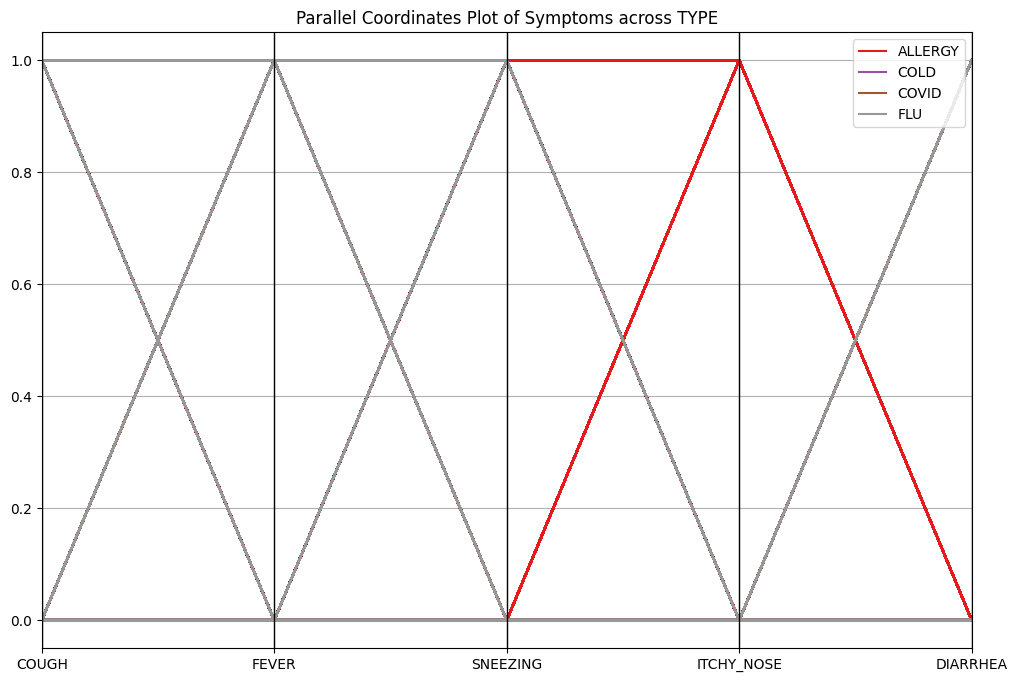

In [ ]:
# 17. Parallel Coordinates Plot for subset of symptoms across TYPE
subset_data = data[['COUGH', 'FEVER', 'SNEEZING', 'ITCHY_NOSE', 'DIARRHEA', 'TYPE']]
plt.figure(figsize=(12, 8))
parallel_coordinates(subset_data, 'TYPE', color=plt.cm.Set1(np.linspace(0, 1, len(data['TYPE'].unique()))))
plt.title('Parallel Coordinates Plot of Symptoms across TYPE')
plt.show()


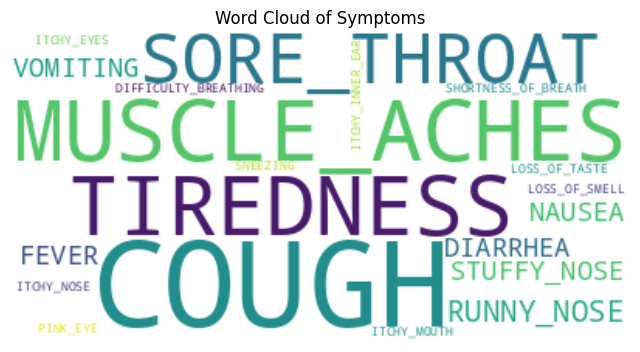

In [ ]:
# 18. Word Cloud for the frequency of symptoms
text = ' '.join(symptom for symptom in symptom_columns)
wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Symptoms')
plt.show()

In [ ]:
# Step 2: Handle Missing Values
# Separate numerical and categorical columns
numerical_features = ['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'RUNNY_NOSE', 'STUFFY_NOSE', 'FEVER',
                      'NAUSEA', 'VOMITING', 'DIARRHEA', 'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING', 'LOSS_OF_TASTE',
                      'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH', 'ITCHY_INNER_EAR', 'SNEEZING', 'PINK_EYE']

categorical_features = ['TYPE']  # Assuming 'TYPE' is the only categorical feature

In [ ]:
# Impute missing values for numerical data with the median
numerical_imputer = SimpleImputer(strategy='median')
data[numerical_features] = numerical_imputer.fit_transform(data[numerical_features])

In [ ]:
# Impute missing values for categorical data with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder to convert categorical 'TYPE' into numeric binary columns
encoder = OneHotEncoder(sparse_output=False)  # sparse_output is used instead of sparse
encoded_categorical_data = encoder.fit_transform(data[categorical_features])

In [ ]:
# Convert encoded data to DataFrame and merge it back
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_features))
data = data.drop(categorical_features, axis=1)
data = pd.concat([data, encoded_categorical_df], axis=1)

In [ ]:
# Prepare X and y for the model
X = data.drop(encoded_categorical_df.columns, axis=1)
y = encoded_categorical_df.values.argmax(axis=1)  # This gives classes like 0, 1, 2, etc. for TYPE

In [ ]:
# Step 5: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution after applying SMOTE
print("Original dataset class distribution:\n", pd.Series(y).value_counts())
print("Resampled dataset class distribution:\n", pd.Series(y_resampled).value_counts())

Original dataset class distribution:
 3    25000
0    16381
2     2048
1     1024
Name: count, dtype: int64
Resampled dataset class distribution:
 0    25000
1    25000
2    25000
3    25000
Name: count, dtype: int64


In [ ]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)